# Set up

In [3]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


In [65]:
# load data
dat = pd.read_csv('Daily-Standup-update-Yannan_2023.csv')
# select the Date in Jan 2023
dat = dat[dat['Date'].str.contains('2023-1-')]
dat["Date"] = pd.to_datetime(dat["Date"], format="%Y-%m-%d")

# fill the missing values with 0 for all numerical columns
dat = dat.fillna(0)
dat.head()

,WeekID,Date,Weekday,Task1,Manuscript1,Type1,Progress1/%,SpentTime1/h,Task2,Manuscript2,Type2,Progress2/%,SpentTime2/h,WordCount,ParagraphCount,ProductivityRating (1-5),ExtraEvent,ExtraTime/h,Comments/Obstacles
0,W155,2023-01-02,1,Refine figures; finish 1st draft,M3,Revision,100.0,2.5,Resolve comments - last paragraph,M1,Revision,100.0,1.5,0.0,0.0,4.0,read & draft,1.5,not recorded: 1.5h reading and writing for T-I...
1,W155,2023-01-03,2,"Bayesian models and examples, pt1/2",T-Intro,Draft,50.0,4.5,Read about inference models,T-Intro,Literature,100.0,1.0,772.0,6.5,3.5,0,0.0,failed in finding useful literature about mode...
2,W155,2023-01-04,3,"Bayesian models and examples, pt2/2",T-Intro,Draft,100.0,3.5,Organize all references: Bayesian models,T-Intro,Literature,100.0,1.0,601.0,4.0,4.5,read,1.0,not recorded: 1h reading about time perception
3,W155,2023-01-05,4,Read Vilares2011-xf and take notes,T-Intro,Literature,100.0,1.5,"Reference repulsion, pt1/4",T-Intro,Draft,65.0,1.5,413.0,2.5,3.0,0,0.0,needed to get off earlier; got distracted
4,W155,2023-01-06,5,"Reference repulsion, pt1/4",T-Intro,Draft,100.0,1.2,"Reference repulsion, pt2/4",T-Intro,Draft,60.0,2.5,690.0,3.5,4.0,0,0.0,0


# All in one plot over time

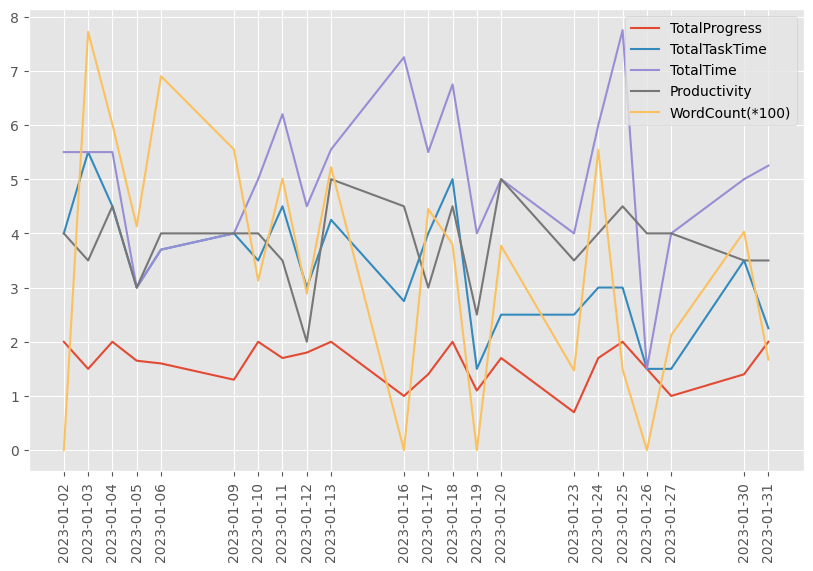

In [97]:
# plot the total progress of each day
# overlay the total task time spent on each task for each day
# overlay the task time + extra time spent on each task for each day
# overlay the productivity for each day
dat['TotalProgress'] = dat["Progress1/%"] + dat["Progress2/%"]
dat['TotalTaskTime'] = dat["SpentTime1/h"] + dat["SpentTime2/h"]
dat['TotalTime'] = dat["TotalTaskTime"] + dat["ExtraTime/h"]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dat['Date'], dat['TotalProgress']/100, label='TotalProgress')
ax.plot(dat['Date'], dat['TotalTaskTime'], label='TotalTaskTime')
ax.plot(dat['Date'], dat['TotalTime'], label='TotalTime')
ax.plot(dat['Date'], dat['ProductivityRating (1-5)'], label='Productivity')
ax.plot(dat['Date'], dat['WordCount']/100, label='WordCount(*100)')

plt.legend()
plt.xticks(dat['Date'], rotation=90)
plt.show()

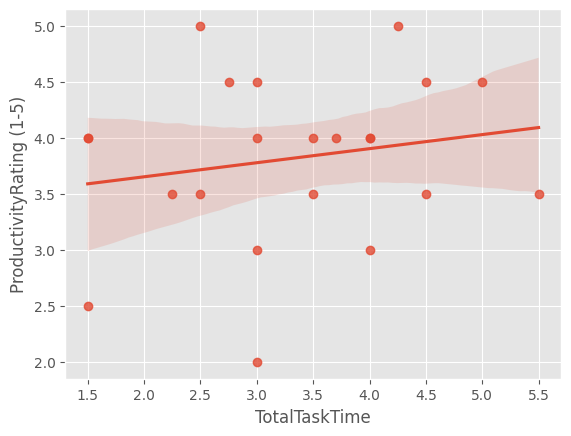

In [102]:
# regression plot between productivity and total task time
sns.regplot(x=dat['TotalTaskTime'], y=dat['ProductivityRating (1-5)'], data=dat)
plt.show()

# Focus on tasks

In [72]:
# split the df into twp df: date, task1, task2
dat_task_1 = dat[['WeekID', 'Date', 'Weekday', 
                        'Task1','Manuscript1', 'Type1', 'Progress1/%', 'SpentTime1/h']]

dat_task_2 = dat[['WeekID', 'Date', 'Weekday', 
                        'Task2', 'Manuscript2', 'Type2', 'Progress2/%', 'SpentTime2/h']]

# remove the numbers in the column names of dat_task_1
dat_task_1.columns = ['WeekID', 'Date', 'Weekday', 'Task','Manuscript', 'Type', 'Progress/%', 'SpentTime/h']
dat_task_1['TaskIndex'] = 'Task1'

dat_task_2.columns = ['WeekID', 'Date', 'Weekday', 'Task', 'Manuscript', 'Type', 'Progress/%', 'SpentTime/h']
dat_task_2['TaskIndex'] = 'Task2'
# concat the two df vertically
dat_task = pd.concat([dat_task_1, dat_task_2], axis=0)

dat_task.sort_values(by=['WeekID', 'Date', 'TaskIndex'], inplace=True)

# replace nan in Type with 'Others'
# dat['Type'].fillna('Others', inplace=True)

dat_task.head()

/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_14220/1536063948.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_task_1['TaskIndex'] = 'Task1'
/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_14220/1536063948.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_task_2['TaskIndex'] = 'Task2'


,WeekID,Date,Weekday,Task,Manuscript,Type,Progress/%,SpentTime/h,TaskIndex
0,W155,2023-01-02,1,Refine figures; finish 1st draft,M3,Revision,100.0,2.5,Task1
0,W155,2023-01-02,1,Resolve comments - last paragraph,M1,Revision,100.0,1.5,Task2
1,W155,2023-01-03,2,"Bayesian models and examples, pt1/2",T-Intro,Draft,50.0,4.5,Task1
1,W155,2023-01-03,2,Read about inference models,T-Intro,Literature,100.0,1.0,Task2
2,W155,2023-01-04,3,"Bayesian models and examples, pt2/2",T-Intro,Draft,100.0,3.5,Task1


## Components of tasks

<AxesSubplot: ylabel='Manuscript'>

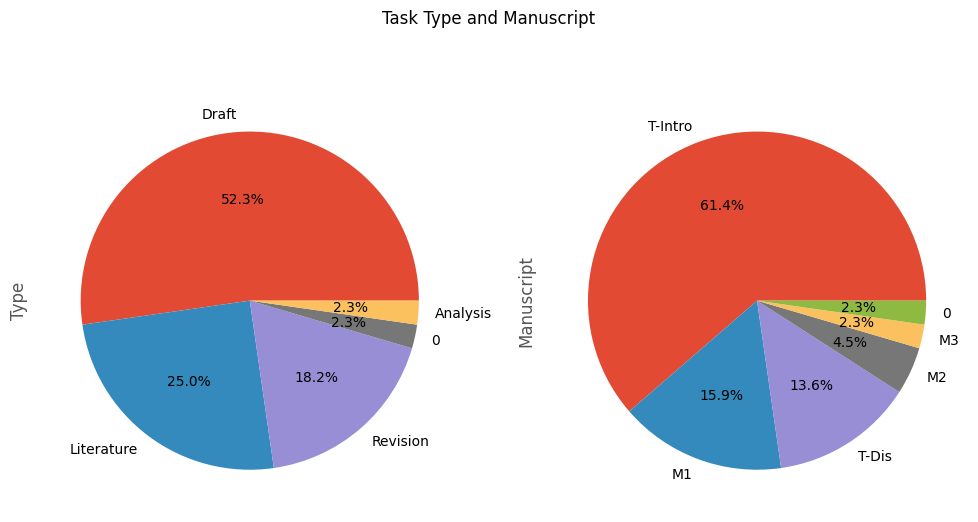

In [79]:
fig, axes = plt.subplots(figsize=(12, 6), ncols=2)
plt.suptitle('Task Type and Manuscript')
# pie chart of the Task Type 

dat_task['Type'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])

# pie chart of manuscripts
dat_task['Manuscript'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1])

## Accomplish states

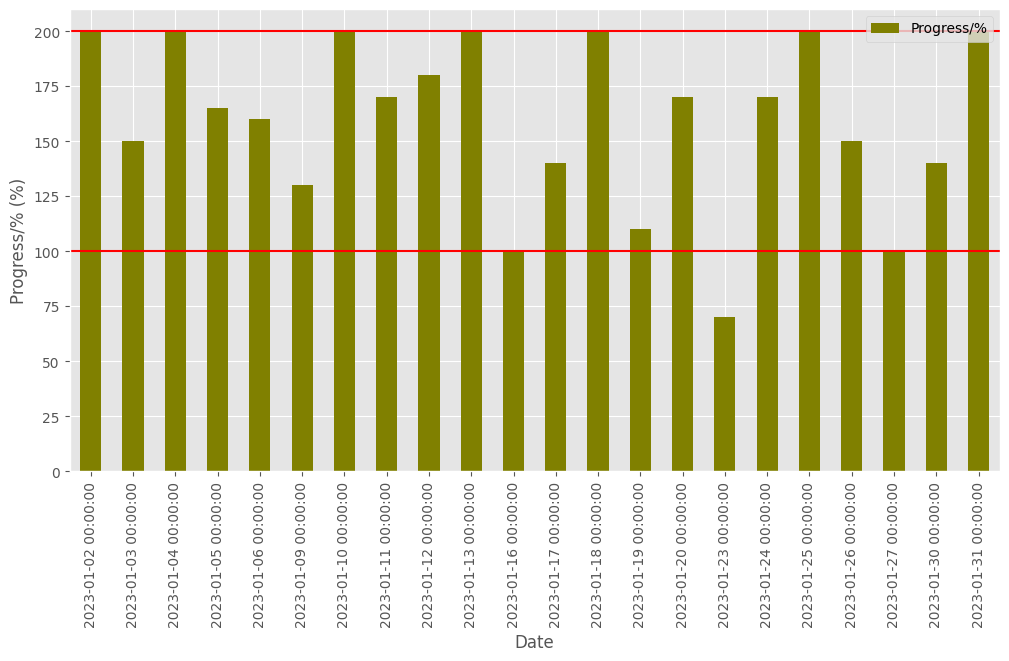

In [81]:
dat_state = dat_task[["Date", "Weekday", "TaskIndex", "Progress/%"]]

# replace nan with 0
dat_state = dat_state.replace(np.nan, 0)

# remove % sign in the column 'Progress/%'
# dat_state['Progress/%'] = dat_state['Progress/%'].str.replace('%', '')

# convert the column 'Progress/%' to float
# dat_state['Progress/%'] = dat_state['Progress/%'].astype(float)

# plot the accomplish state of each day as bars
fig, ax = plt.subplots(figsize=(12, 6))
dat_state_by_date = dat_state[["Date", "Progress/%"]].groupby("Date").sum().reset_index()
dat_state_by_date[["Date", "Progress/%"]].plot(x="Date", y=["Progress/%"], kind="bar", rot=90, ax=ax, color='olive')
plt.ylabel('Progress/% (%)')

# plot two horizontal lines indicate 100% and 200%
plt.axhline(y=100, color='r', linestyle='-')
plt.axhline(y=200, color='r', linestyle='-')


/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_14220/2258318980.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.catplot(x="Weekday", y="Progress/%", hue="TaskIndex", kind="bar", data=dat_state, ci=68, height=6, aspect=1.5)


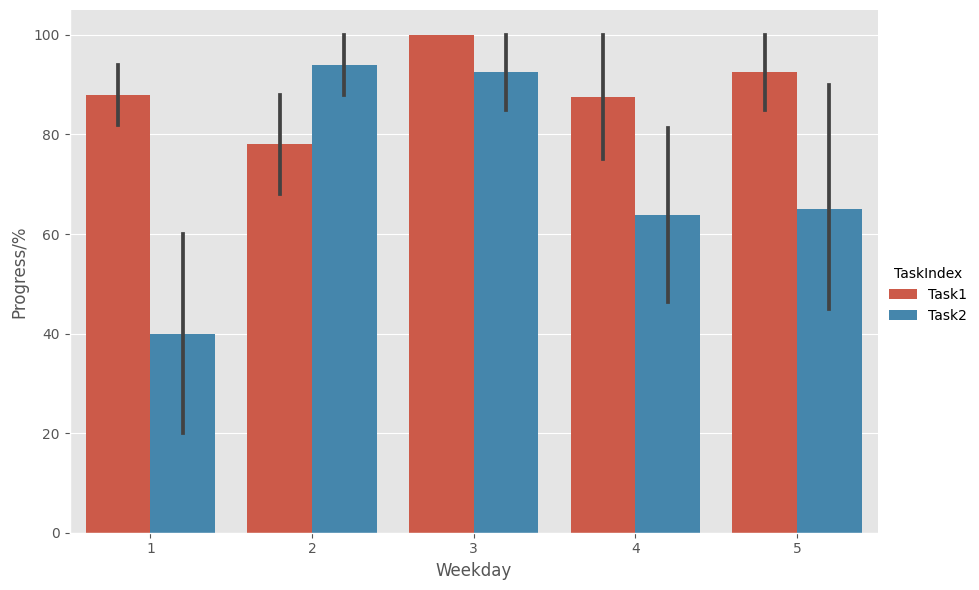

In [103]:
# plot the accomplish state of each day as bars
# fig, ax = plt.subplots(figsize=(12, 6))
# dat_yn_state_by_weekday = dat_yn_state[["Weekday", "TaskIndex", "Progress/%"]].groupby(["Weekday", "TaskIndex"]).mean().reset_index()
# dat_yn_state_by_weekday.pivot(index="Weekday", columns= "TaskIndex", values="Progress/%").plot( kind="bar", rot=90, ax=ax)
# plt.ylabel('Progress/% (%)')

# plot two horizontal lines indicate 100% and 200%
# plt.axhline(y=100, color='r', linestyle='-')

sns.catplot(x="Weekday", y="Progress/%", hue="TaskIndex", kind="bar", data=dat_state, ci=68, height=6, aspect=1.5)

## Lingering tasks

In [85]:
# find repeated tasks in the task column for each manuscript
dat_task.groupby(['Manuscript', 'Type'])['Task'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

,Manuscript,Type,Task,count
10,T-Dis,Draft,"Color vs orientation, pt1",2
3,M1,Revision,Resolve comments & general revision,2
17,T-Intro,Draft,"Reference repulsion, pt4/4",2
32,T-Intro,Literature,Read textbook: color vision and pathways,2
31,T-Intro,Literature,General introduction of sensory information pr...,2
16,T-Intro,Draft,"Reference repulsion, pt2/4",2
15,T-Intro,Draft,"Reference repulsion, pt1/4",2
27,T-Intro,Draft,"General introduction of contextual bias, scien...",1
23,T-Intro,Draft,"Color perception, pt 2/4",1
24,T-Intro,Draft,"Color perception, pt 3-4/4, fill in reference",1


# Word counts

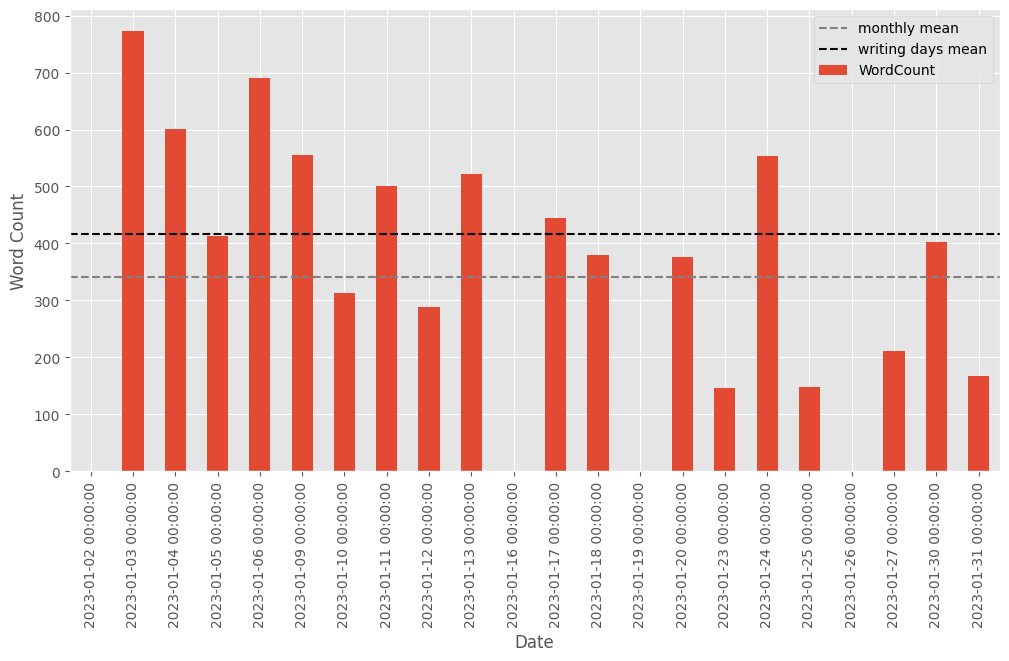

In [87]:
# bar plot wordcount of each day
fig, ax = plt.subplots(figsize=(12, 6))
dat_raw_wc = dat[["Date", "WordCount"]].groupby("Date").sum().reset_index().sort_values(by='Date')
dat_raw_wc[["Date", "WordCount"]].plot(x="Date", y=["WordCount"], kind="bar", rot=90, ax=ax)
plt.axhline(y=dat_raw_wc['WordCount'].mean(), color='gray', linestyle='--', label='monthly mean')
plt.axhline(y=dat_raw_wc.query("WordCount!=0")['WordCount'].mean(), color='black', linestyle='--', label='writing days mean')

plt.ylabel('Word Count')
plt.legend()

/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_14220/3146517421.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.catplot(x="Weekday", y="WordCount", kind="bar", data=dat, ci=95, height=6, aspect=1.5)


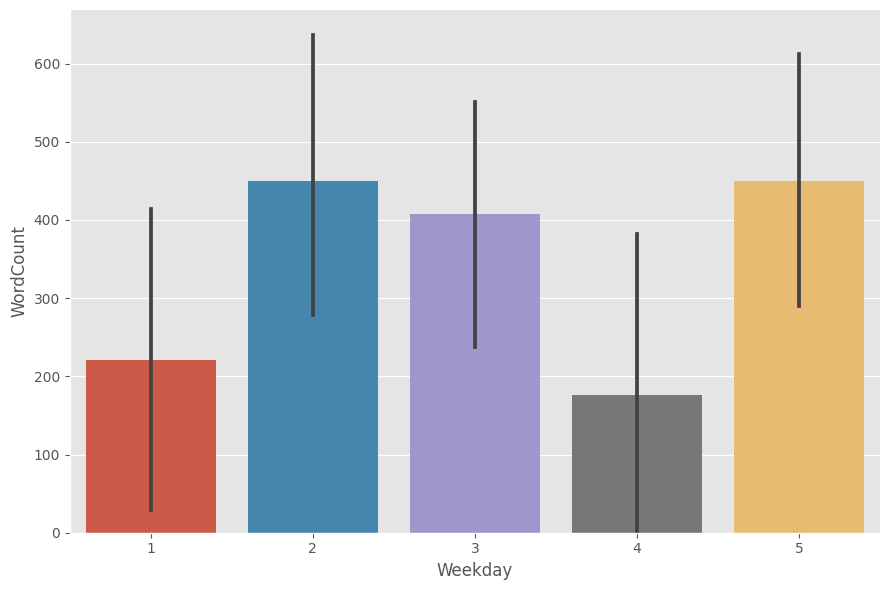

In [89]:
# bar plot wordcount of each weekday
# fig, ax = plt.subplots(figsize=(12, 6))
# dat_yn_raw_wc = dat_yn_raw[["Weekday", "WordCount"]].groupby("Weekday").sum().reset_index()
# dat_yn_raw_wc[["Weekday", "WordCount"]].plot(x="Weekday", y=["WordCount"], kind="bar", rot=90, ax=ax)
# plt.ylabel('WordCount Sum')

sns.catplot(x="Weekday", y="WordCount", kind="bar", data=dat, ci=95, height=6, aspect=1.5)


# Working hours

/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_14220/2674570207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_extra.rename(columns={'ExtraTime/h': 'SpentTime/h'}, inplace=True)
/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_14220/2674570207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_extra['TaskIndex'] = 'Extra'
/var/folders/fl/4b_jqvfn04s7k0xkwng1489c0000gr/T/ipykernel_14220/2674570207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

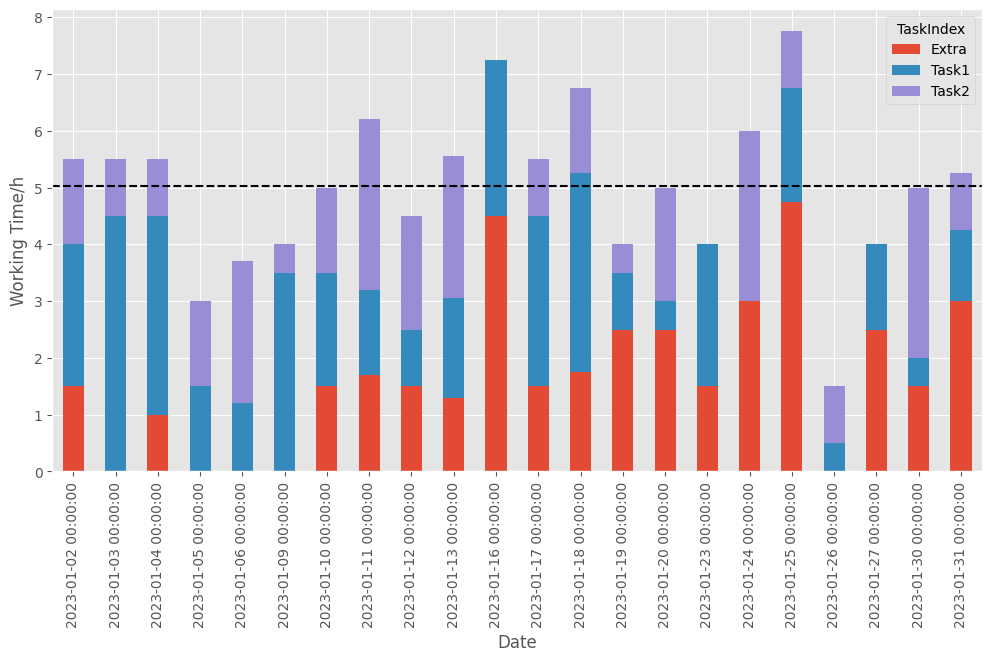

In [93]:
dat_extra = dat[['WeekID', 'Date', 'Weekday', "ExtraEvent", "ExtraTime/h"]]

dat_extra.rename(columns={'ExtraTime/h': 'SpentTime/h'}, inplace=True)
dat_extra['TaskIndex'] = 'Extra'
dat_extra['Type'] = 'Extra'


# concat it with the dat
dat_st = pd.concat([dat_task, dat_extra], axis=0)

# plot stacked bar chart of Time of each day, colored by TaskIndex
fig, ax = plt.subplots(figsize=(12, 6))
dat_time = dat_st[["Date", "TaskIndex", "SpentTime/h"]].groupby(["Date", "TaskIndex"]).sum().reset_index()
dat_time.pivot(index="Date", columns= "TaskIndex", values="SpentTime/h").plot(kind="bar", rot=90, ax=ax, stacked=True)
plt.ylabel('Working Time/h')

plt.axhline(y=dat_time.groupby("Date")["SpentTime/h"].sum().mean(), color='black', linestyle='--', label=' mean')

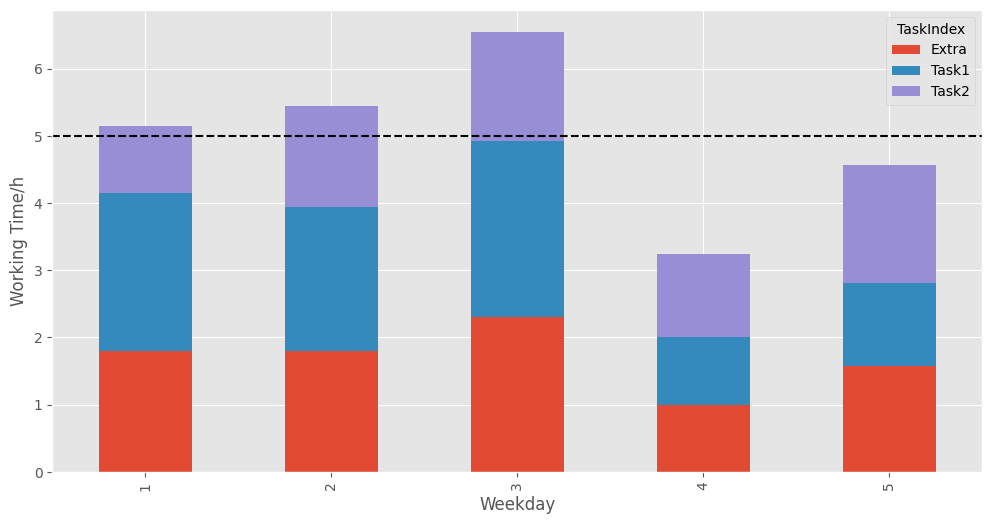

In [105]:

# plot stacked bar chart of Time of each day, colored by TaskIndex
fig, ax = plt.subplots(figsize=(12, 6))
dat_time = dat_st[["Weekday", "TaskIndex", "SpentTime/h"]].groupby(["Weekday", "TaskIndex"]).mean().reset_index()
# dat_time = dat_st[["Weekday", "TaskIndex", "SpentTime/h"]].groupby(["Weekday", "TaskIndex"]).sum().reset_index()
dat_time.pivot(index="Weekday", columns= "TaskIndex", values="SpentTime/h").plot(kind="bar", rot=90, ax=ax, stacked=True)
plt.ylabel('Working Time/h')

plt.axhline(y=dat_time.groupby("Weekday")["SpentTime/h"].sum().mean(), color='black', linestyle='--', label=' mean')

<AxesSubplot: ylabel='SpentTime/h'>

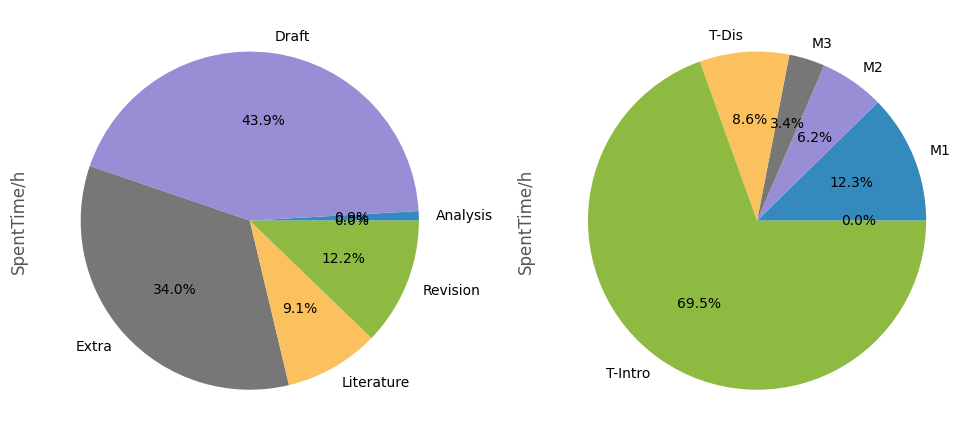

In [96]:
# plot pie chart - time spent on each task type
fig, axes = plt.subplots(figsize=(12, 6), ncols=2)
dat_st.groupby('Type')['SpentTime/h'].sum().plot.pie(autopct='%1.1f%%', ax=axes[0])
dat_st.groupby('Manuscript')['SpentTime/h'].sum().plot.pie(autopct='%1.1f%%', ax=axes[1])

<!-- ## Summary - 2022 Nov-Dec -->

<!-- - interesting to know
    - Monday is a good day for writing (?)
    - Tuesday is a multi-task day = hard to concentrate
    - revising (i.e. thinking and reasoning) is way more time-consuming than I imagine
    - revising can trigger procrastination 

- keep going
    - multi-tasking; switching between manuscripts
    - take small steps

- to be improved
    - writing productivity / intensive writing
    - refine things -->